In [4]:
import pandas as pd 
import logging 
import numpy as np
import os 


log = logging.getLogger() 
console = logging.StreamHandler()
format_str = '%(asctime)s\t%(levelname)s -- %(processName)s -- %(message)s'
console.setFormatter(logging.Formatter(format_str))
log.addHandler(console) 
log.setLevel(logging.INFO) 

'''
MODULE is used to identify and segment runtime and environment variables from configuration files.
'''
MODULE = 'ldg_finviz'

d = os.getcwd()
df = d + '\\config\\'
try: 
    for i in os.listdir(df):
        k = i[:-4] 
        v = open(df + i).read()
        v = eval(v)
        exec("%s=%s" % (k,v))   
        log.info('loaded: ' + k)
except:
    log.error('issue with eval(data): ' + str(v))
    

2020-06-18 13:15:00,818	INFO -- MainProcess -- loaded: api_params
2020-06-18 13:15:00,818	INFO -- MainProcess -- loaded: api_params
2020-06-18 13:15:00,818	INFO -- MainProcess -- loaded: api_params
2020-06-18 13:15:00,823	INFO -- MainProcess -- loaded: data_var
2020-06-18 13:15:00,823	INFO -- MainProcess -- loaded: data_var
2020-06-18 13:15:00,823	INFO -- MainProcess -- loaded: data_var
2020-06-18 13:15:00,825	INFO -- MainProcess -- loaded: env_var
2020-06-18 13:15:00,825	INFO -- MainProcess -- loaded: env_var
2020-06-18 13:15:00,825	INFO -- MainProcess -- loaded: env_var
2020-06-18 13:15:00,827	INFO -- MainProcess -- loaded: err_var
2020-06-18 13:15:00,827	INFO -- MainProcess -- loaded: err_var
2020-06-18 13:15:00,827	INFO -- MainProcess -- loaded: err_var
2020-06-18 13:15:00,829	INFO -- MainProcess -- loaded: map_generic_fn
2020-06-18 13:15:00,829	INFO -- MainProcess -- loaded: map_generic_fn
2020-06-18 13:15:00,829	INFO -- MainProcess -- loaded: map_generic_fn
2020-06-18 13:15:00,83

In [57]:
stg_path = env_var.get('stg_path')
ldg_path = env_var.get('ldg_path')
print(stg_path)
ffin = stg_path + data_var[MODULE].get('stock_ownership')
sdf = pd.read_csv(ffin)
ldf = pd.read_csv(ldg_path + data_var[MODULE].get('stock_ownership'))
ldf.head()
sdf.head()


sdf.isna().sum()  
sdf.info()

C:\temp\processed\
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7522 entries, 0 to 7521
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7522 non-null   int64  
 1   No.            7522 non-null   int64  
 2   Ticker         7522 non-null   object 
 3   Market Cap     5268 non-null   float64
 4   Outstanding    5268 non-null   float64
 5   Float          4741 non-null   float64
 6   Insider Own    7522 non-null   float64
 7   Insider Trans  7522 non-null   float64
 8   Inst Own       7522 non-null   float64
 9   Inst Trans     7522 non-null   float64
 10  Float Short    7522 non-null   float64
 11  Short Ratio    7522 non-null   float64
 12  Avg Volume     7522 non-null   int64  
 13  Price          7522 non-null   float64
 14  Change         7522 non-null   float64
 15  Volume         7522 non-null   object 
dtypes: float64(11), int64(3), object(2)
memory usage: 940.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7522 entries, 0 to 7521
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7522 non-null   int64  
 1   No.            7522 non-null   int64  
 2   Ticker         7522 non-null   object 
 3   Market Cap     5268 non-null   float64
 4   Outstanding    5268 non-null   float64
 5   Float          4741 non-null   float64
 6   Insider Own    7522 non-null   float64
 7   Insider Trans  7522 non-null   float64
 8   Inst Own       7522 non-null   float64
 9   Inst Trans     7522 non-null   float64
 10  Float Short    7522 non-null   float64
 11  Short Ratio    7522 non-null   float64
 12  Avg Volume     7522 non-null   int64  
 13  Price          7522 non-null   float64
 14  Change         7522 non-null   float64
 15  Volume         7522 non-null   object 
dtypes: float64(11), int64(3), object(2)
memory usage: 940.4+ KB
['Insider Own', 'Insider Trans', 'Fl

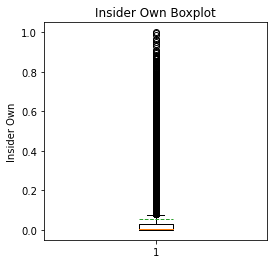

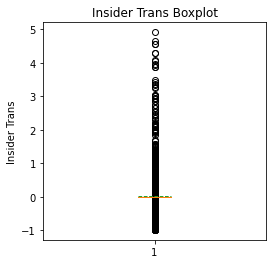

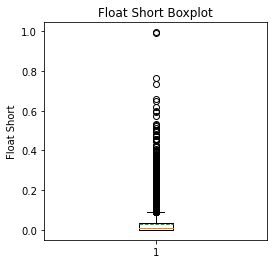

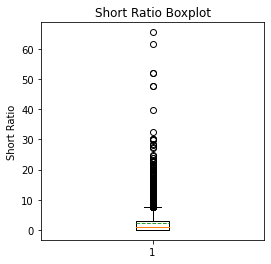

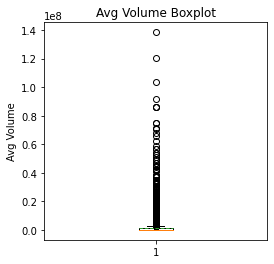

In [63]:
%matplotlib inline

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pandas
#from pandas.tools.plotting import scatter_matrix

#plt.figure(figsize=[8,8])
#plt.boxplot(x=sdf['Insider Own'], showmeans = True, meanline = True)
#plt.title('Insider Own Boxplot')
#plt.ylabel('Insider Own')

l = list(sdf.columns)
l.remove("Ticker")
l.remove("No.")
l.remove("Unnamed: 0")
#short ratio and volume
#l = ['Insider Own']
sdf.info()
l = ['Insider Own','Insider Trans','Float Short','Short Ratio','Avg Volume']
for i in l:
    plt.figure(figsize=[4,4])
    plt.boxplot(x=sdf[i], showmeans = True, meanline = True)
    plt.title(i + ' Boxplot')
    plt.ylabel(i)
    
print(l)

In [58]:
#sdf['Volume','Short Ratio']= 
sdf['Volume'].astype(dtype='float')
        

ValueError: could not convert string to float: '832,008'

In [72]:
sdf['Change_flg'] = 0
sdf['Change_flg'] = np.where(sdf['Change']>0,1,0)

bins=[-100,0,3,5,10,20,100]
labels=[1,2,3,4,5,6]

sdf['Change_bin'] = pd.cut((sdf['Change']*100).astype('int'),bins,labels=labels)
#(df['Change'] * 100).astype('int').bin(8)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X 

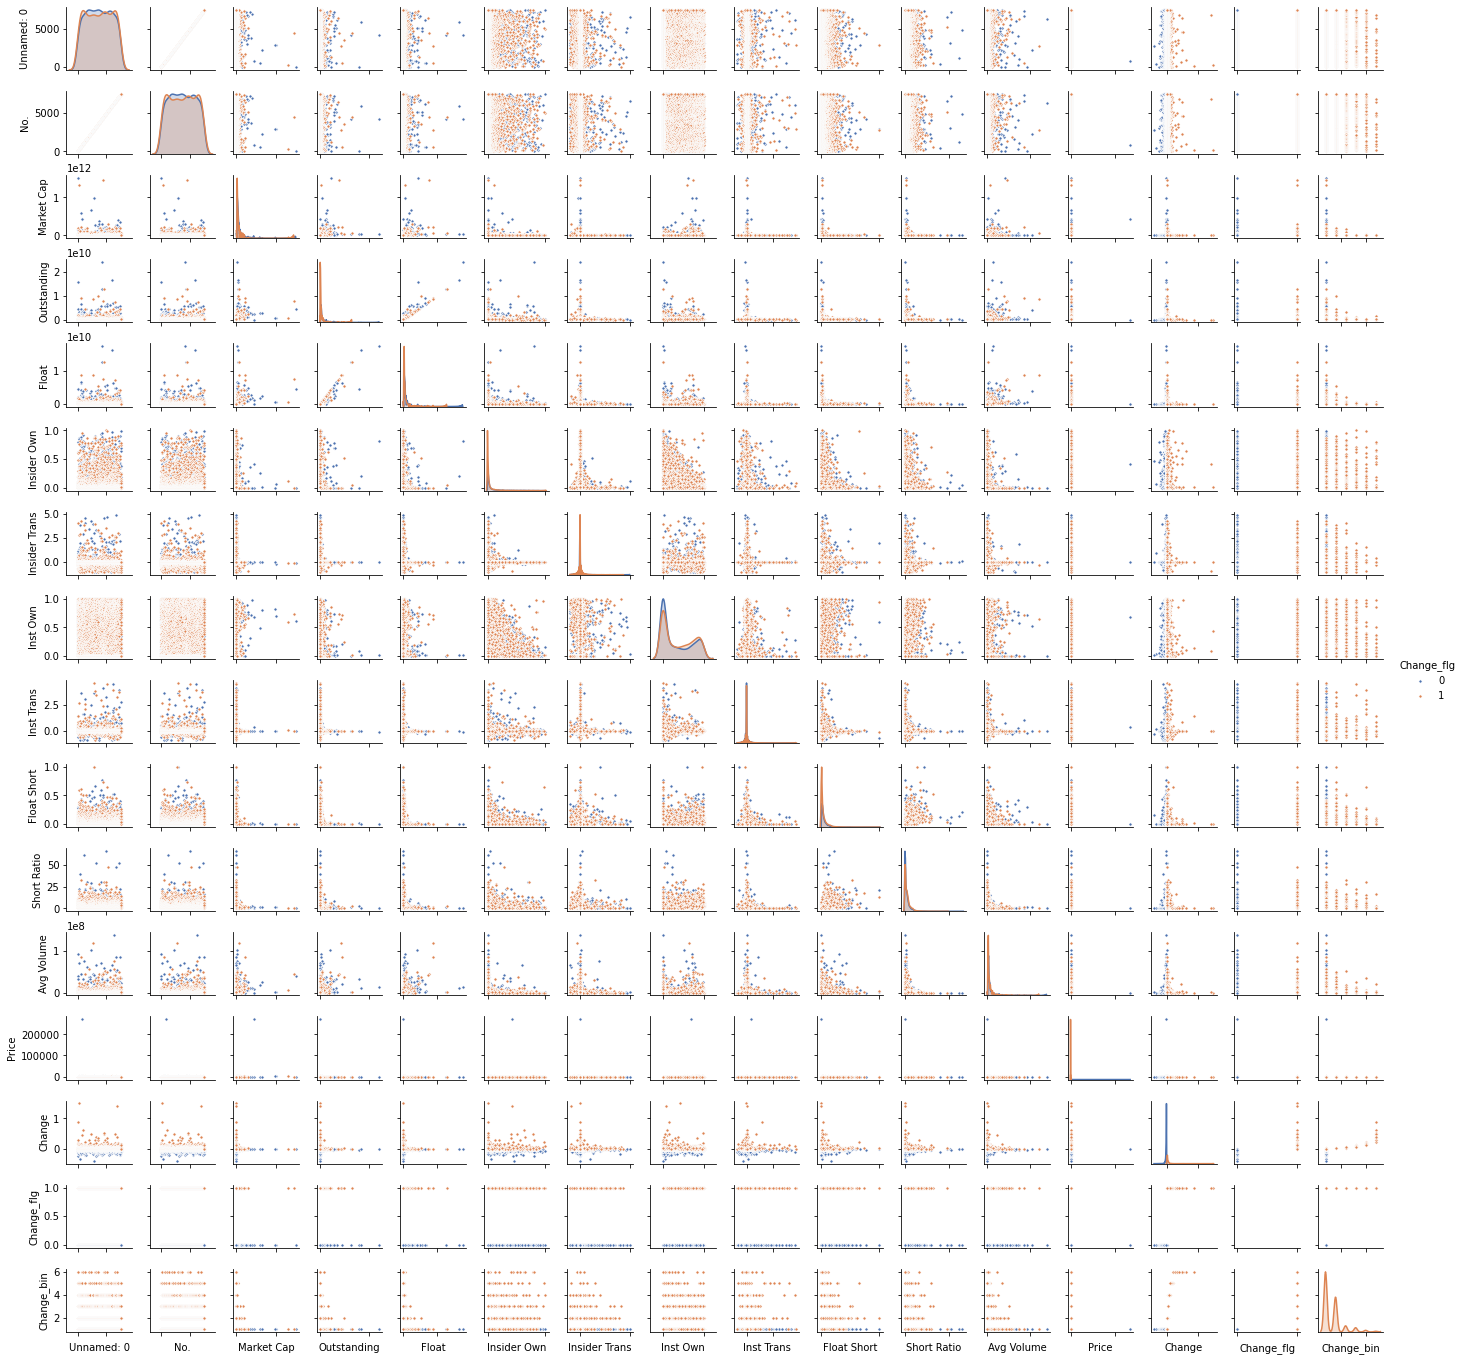

In [75]:
sdf.head()
pp = sns.pairplot(sdf, hue = 'Change_flg', palette='deep', size = 1.2, diag_kind='kde',
                  diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

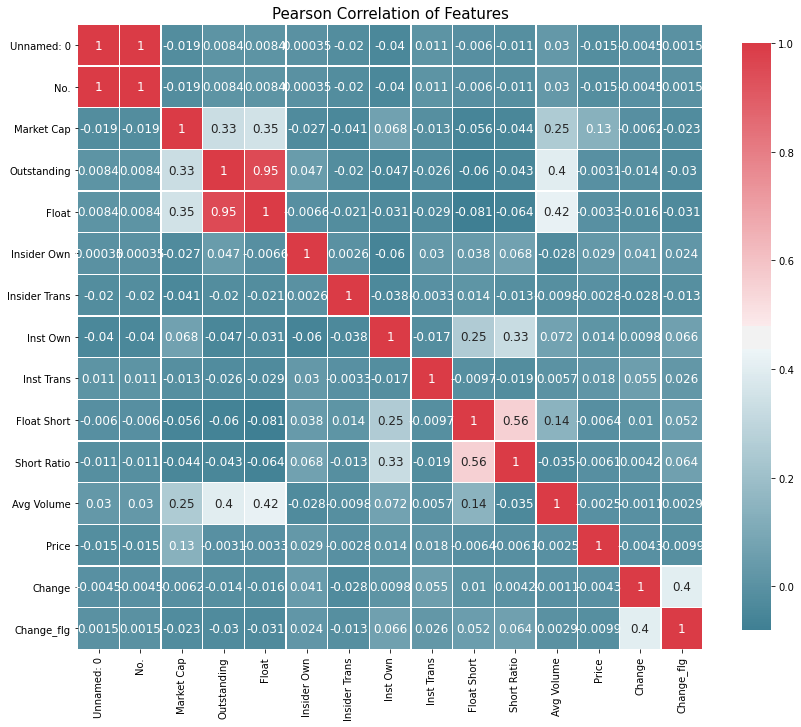

In [77]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(sdf)